# ***Netflix Data : Cleaning, Analysis and Visulization***

![Netflix](https://asicsulb.org/corporate/images/connect/beachfront/2020-06/awaken-your-creativity-with-netflix-inspired-meals.jpg)


# ***1. Introduction***

## ***Project Overview***

*This notebook demonstrates the process of Netflix Data Cleaning, Analysis and Visulization. We'll walk through the following steps:*

*1. Importing Libraries*

*2. Load the Dataset*

*3. Data Cleaning*

*4. Exploratory Data Analysis (EDA)*

*5. Conclusion and Insights*

## ***About Dataset***

*Netflix is a popular streaming service that offers a vast catalog of movies, TV shows, and original contents. This
dataset is a cleaned version of the original version which can be found here. The data consist of contents added to
Netflix from 2008 to 2021. The oldest content is as old as 1925 and the newest as 2021. This dataset will be
cleaned with PostgreSQL and visualized with Tableau. The purpose of this dataset is to test my data cleaning and
visualization skills. The cleaned data can be found below and the Tableau dashboard can be found here.*

## ***Motivation***

*Accurate content recommendation models are invaluable in the streaming industry, aiding:*

- *Understanding audience preferences and content trends to inform content creation and acquisition strategies.*
- *Identifying opportunities to improve user engagement and retention through data-driven insights.*
- *Enhancing the user experience by providing personalized content recommendations based on viewing habits and preferences.*
- *Optimizing content distribution and marketing efforts through data analysis and visualization.* 
- *Gaining a competitive edge in the streaming industry by leveraging data insights to drive business decisions.*


## ***Data Description***

*Our dataset comprises the following key features:*

| *Feature* | *Description* |
|---------|-------------|
| *show_id* | *Unique identifier for each show* |
| *type* | *Type of content (Movie or TV Show)* |
| *title* | *Title of the show* |
| *director* | *Director of the show* |
| *country* | *Country of origin* |
| *date_added* | *Date the show was added to Netflix* |
| *release_year* | *Year the show was released* |
| *rating* | *Rating of the show* |
| *duration* | *Duration of the show* |
| *listed_in* | *Genres the show is listed under* |

*This dataset provides a unique opportunity to delve into the factors that shape the popularity of Netflix content and develop a robust model for predicting audience preferences.*

### ***1. Importing Libraries***

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# remove warnings
import warnings
warnings.filterwarnings('ignore')


### ***2. Load the Dataset***

In [4]:
# we have a dataset named netflix1 inside input folder
data = pd.read_csv('./input/netflix1.csv')

# Display the first five rows of the dataset
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
# Describe the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [6]:
# Checking the shape of the data
num_rows, num_cols = data.shape

print("Shape of the Data:")
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_cols}\n")

Shape of the Data:
Number of Rows: 8790
Number of Columns: 10



### ***3. Data Cleaning***

*Identify and handle missing data, correct data types, and drop duplicates.*

In [7]:
# Check for missing values
print(data.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [8]:
# Checking duplicates if any
data.duplicated().any()

False

In [9]:
# Convert 'date_added' to datetime
data['date_added'] = pd.to_datetime(data['date_added'])

In [10]:
# Show data types to confirm changes
data.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

### ***4. Exploratory Data Analysis (EDA)***

#### ***4.1 Content Type Distribution (Movies vs. TV Shows)***

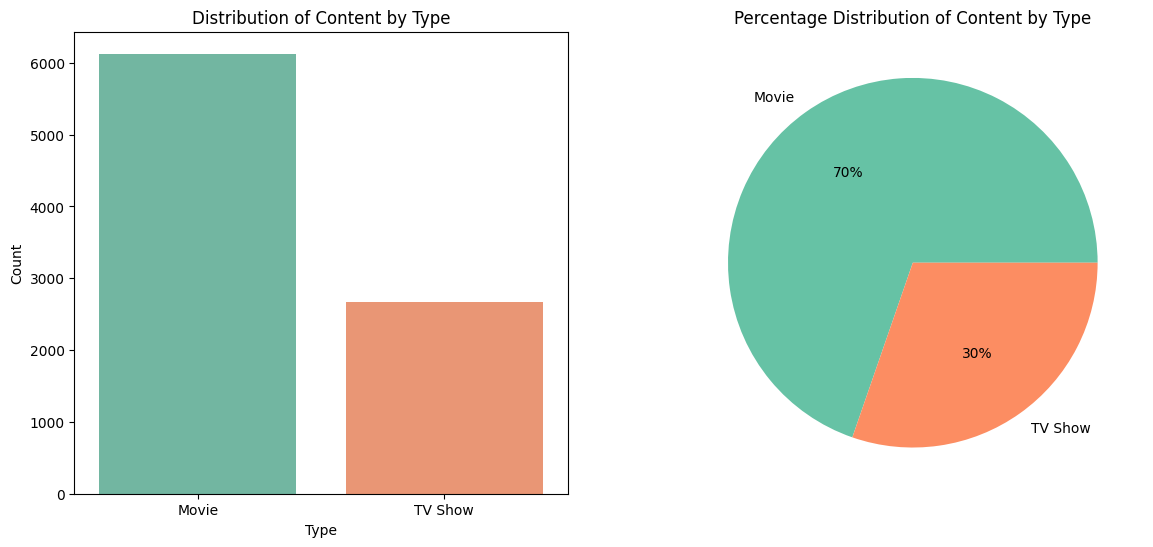

In [11]:
# Count the number of Movies and TV Shows
type_counts = data['type'].value_counts()
# Plot the distribution
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.pie(type_counts, labels=type_counts.index, autopct='%.0f%%', colors=sns.color_palette('Set2'))
plt.title('Percentage Distribution of Content by Type')
plt.show()

#### ***4.2 Rating Frequency (Movies vs. TV Shows)***

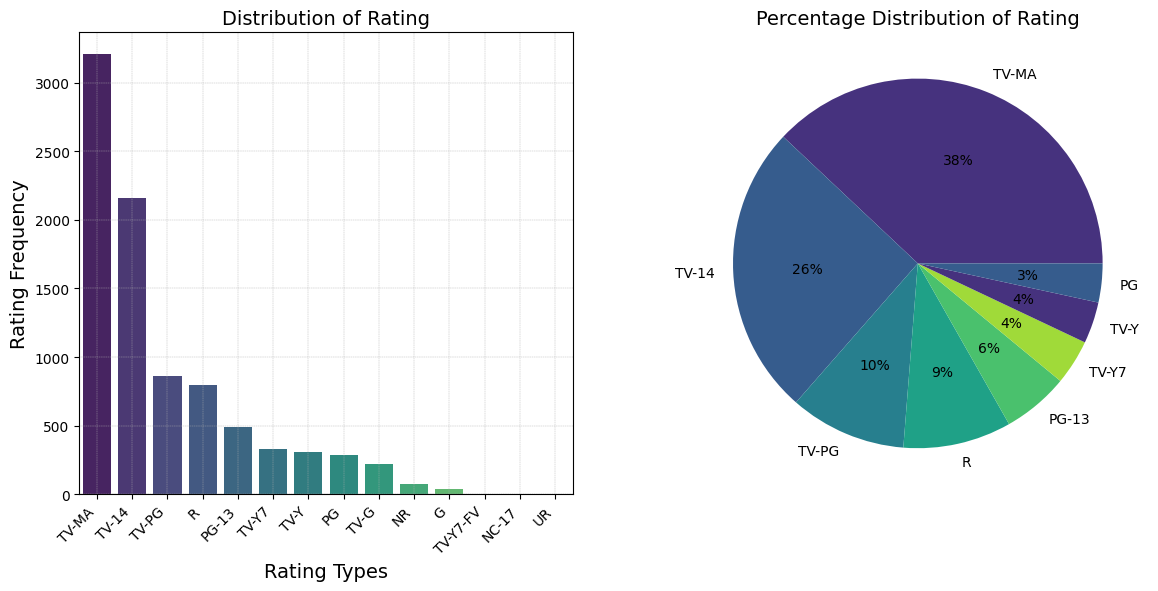

In [56]:
ratings = data['rating'].value_counts().reset_index().sort_values(by='count', ascending=False)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='rating', y='count', data=ratings, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Rating Types", fontsize=14)
plt.ylabel("Rating Frequency", fontsize=14)
plt.title('Distribution of Rating', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.3)

plt.subplot(1, 2, 2)
plt.pie(ratings['count'][:8], labels=ratings['rating'][:8], autopct='%.0f%%', colors=sns.color_palette('viridis'))
plt.title('Percentage Distribution of Rating', fontsize=14)
plt.show()

#### ***4.3 Top 10 Countries with Most Content***

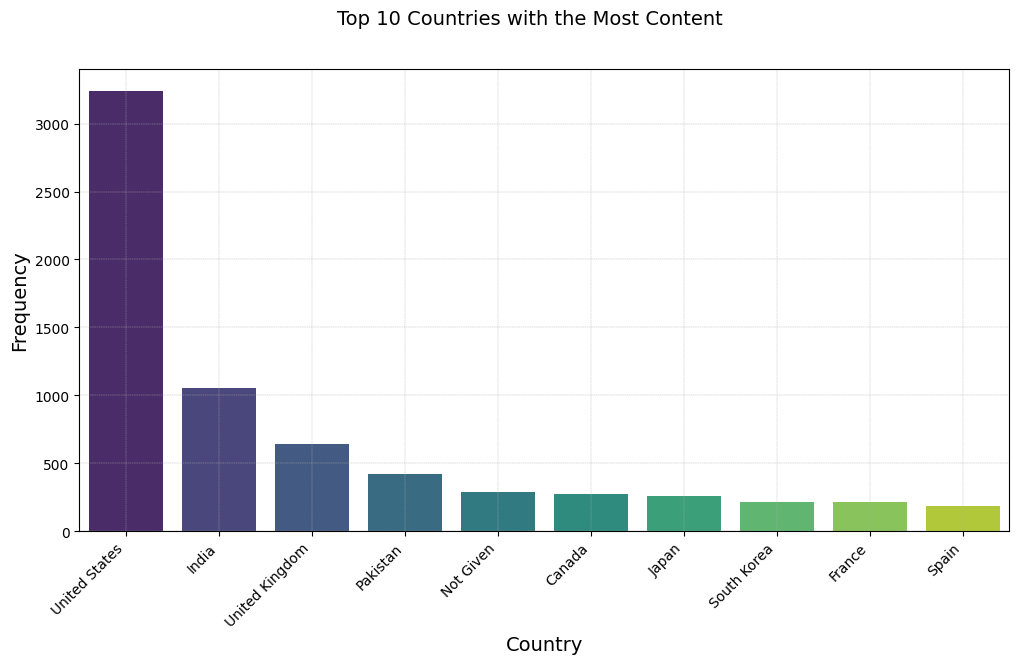

In [55]:
top_ten_countries = data['country'].value_counts().reset_index().sort_values(by='count', ascending=False)[:10]
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='count', data=top_ten_countries, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.suptitle("Top 10 Countries with the Most Content", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.3)
plt.show()

#### ***4.4 Top 15 Directors with the Most Titles***

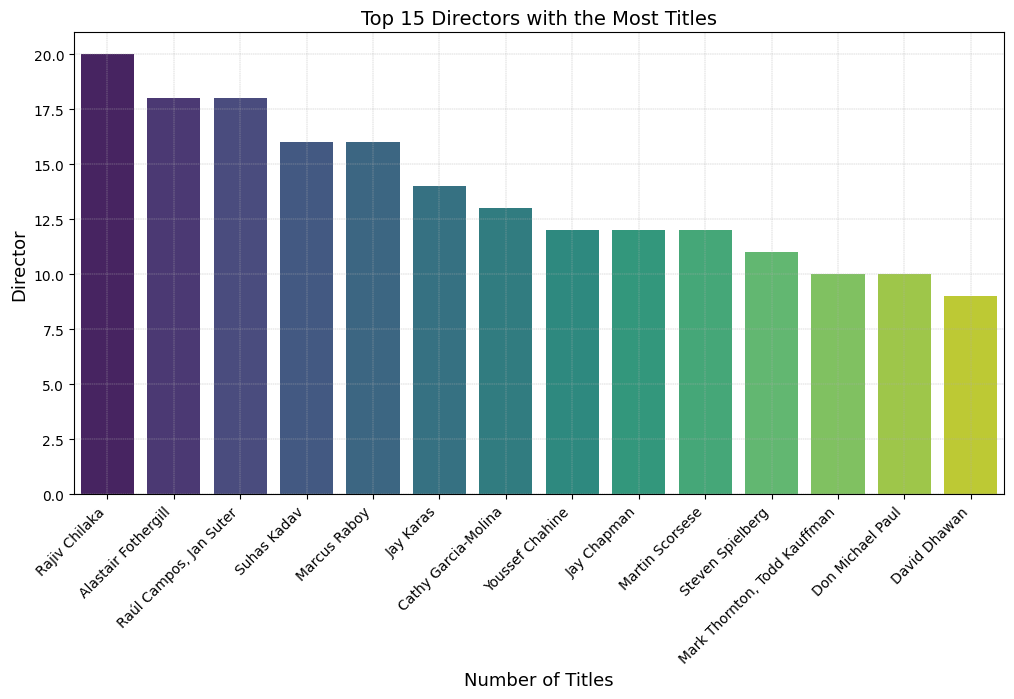

In [54]:
# Count titles by director
top_directors = data['director'].value_counts().reset_index().sort_values(by='count', ascending=False)[1:15]
# Plot top directors
plt.figure(figsize=(12, 6))
sns.barplot(y='count', x='director', data=top_directors, palette='viridis')
plt.title('Top 15 Directors with the Most Titles', fontsize=14)
plt.xlabel('Number of Titles', fontsize=13)
plt.ylabel('Director', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.grid(True, which='both', linestyle='--', linewidth=0.3)
plt.show()

#### ***4.5 Top 10 Popular Movie Genres***

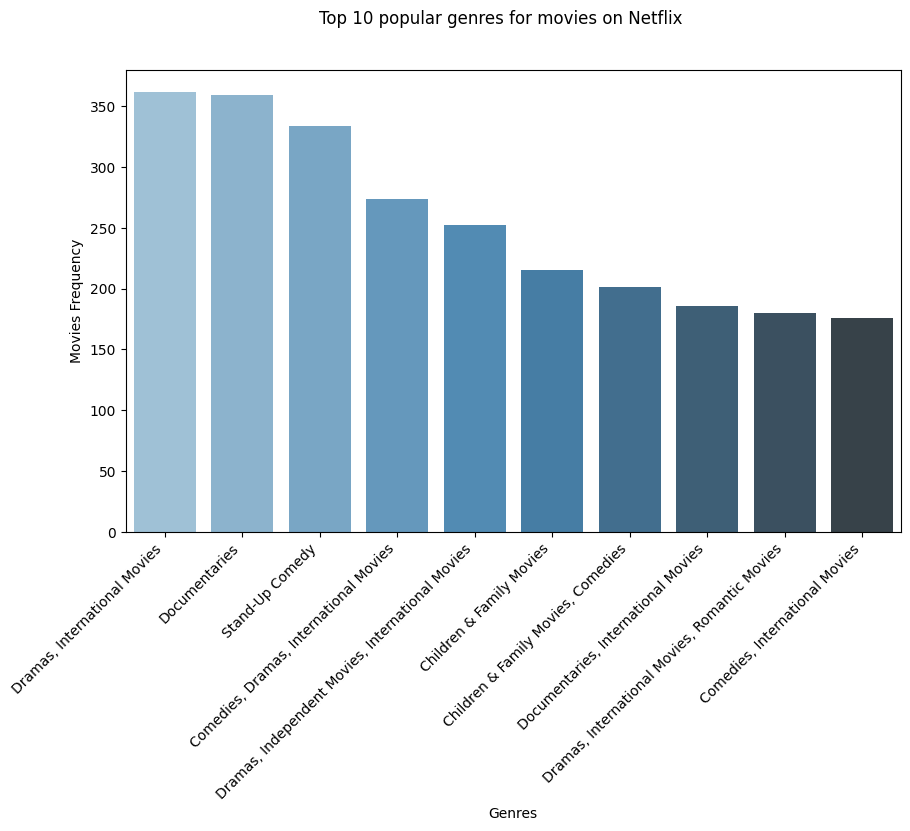

In [27]:
popular_movie_genre=data[data['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]
popular_series_genre=data[data['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False)[:10]

plt.figure(figsize=(10, 6))
sns.barplot(x=popular_movie_genre.index, y=popular_movie_genre.values, palette='Blues_d')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Movies Frequency")
plt.suptitle("Top 10 popular genres for movies")
plt.show()

#### ***4.6 Top 10 TV Shows Genres***

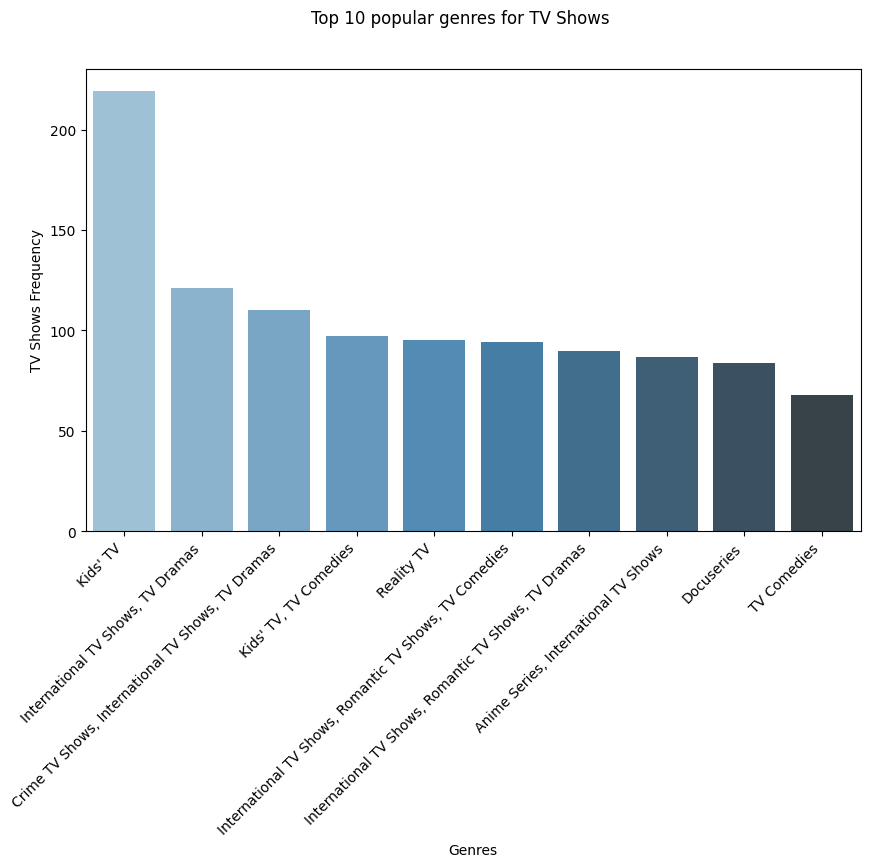

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_series_genre.index, y=popular_series_genre.values, palette='Blues_d')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("TV Shows Frequency")
plt.suptitle("Top 10 popular genres for TV Shows")
plt.show()

In [14]:
# Extract year and month from 'date_added'
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

#### ***4.7 Monthly Releases of Movies and TV shows***

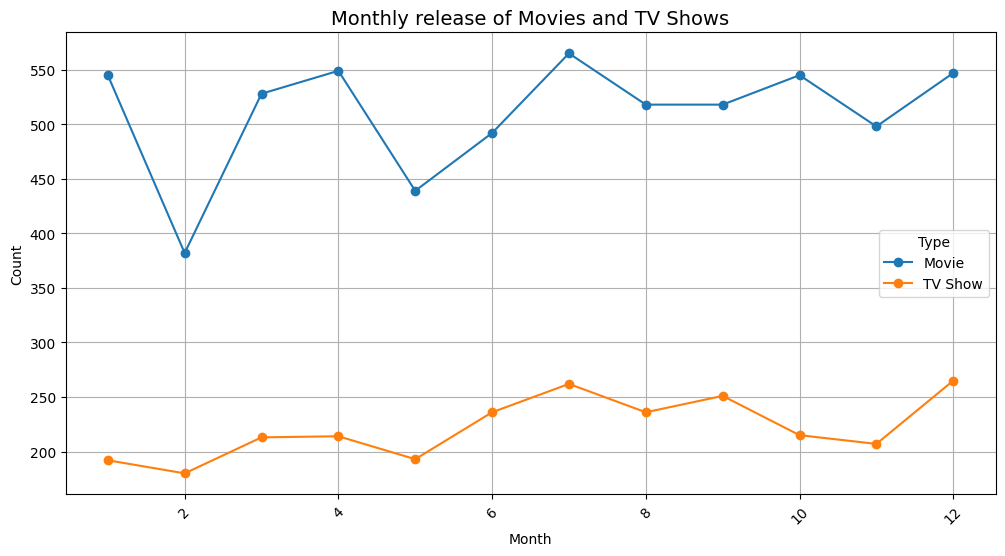

In [23]:
# Plot content added over the months using a line chart
plt.figure(figsize=(12, 6))
data.groupby(['month_added', 'type']).size().unstack().plot(kind='line', marker='o', ax=plt.gca())
plt.title('Monthly release of Movies and TV Shows', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.grid(True)
plt.show()

#### ***4.8 Yearly Releases of Movies and TV shows***

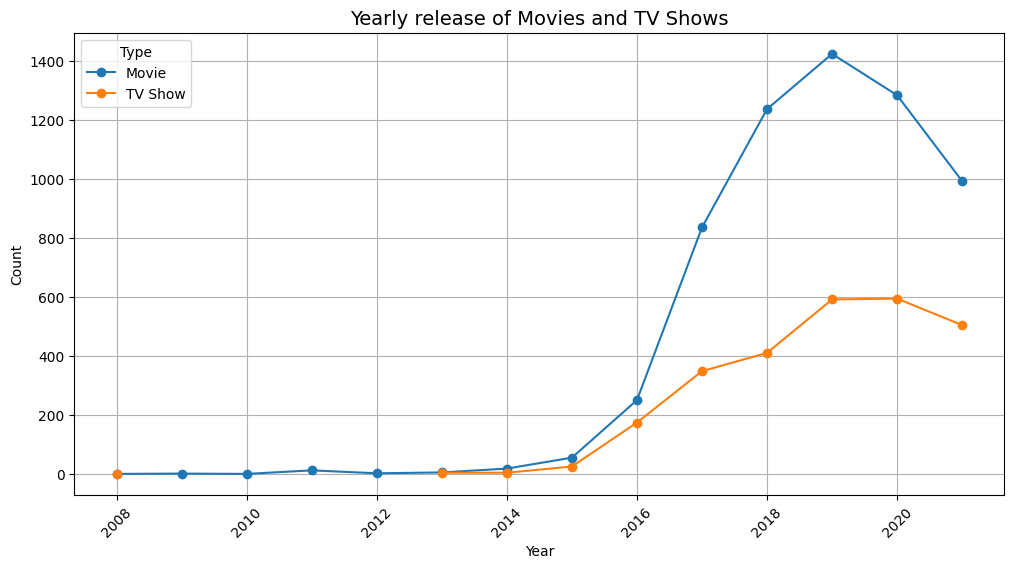

In [21]:
# Plot content added over the years using a line chart
plt.figure(figsize=(12, 6))
data.groupby(['year_added', 'type']).size().unstack().plot(kind='line', marker='o', ax=plt.gca())
plt.title('Yearly release of Movies and TV Shows', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.grid(True)
plt.show()

#### ***4.9 Word Cloud of Movie Titles***

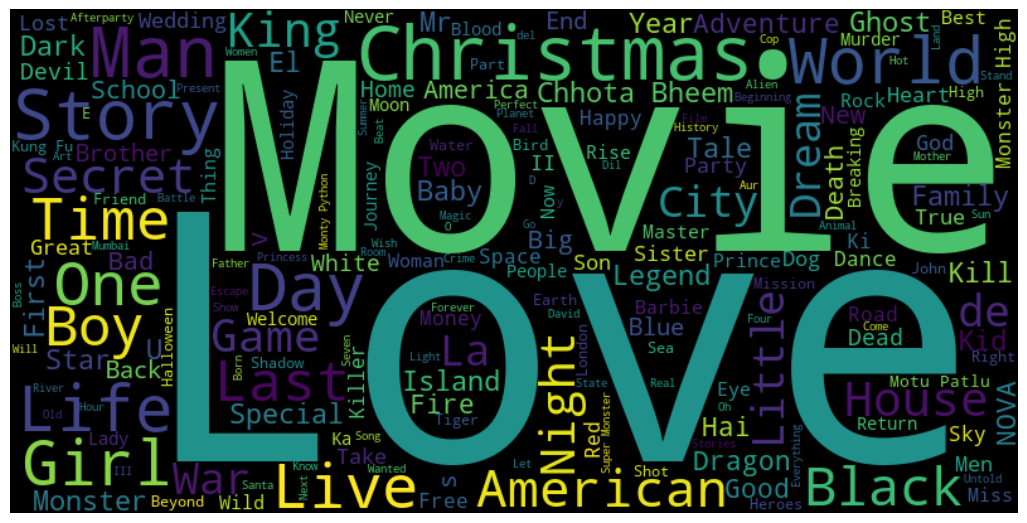

In [67]:
# Create a word cloud for movie titles
movie_titles = data[data['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))

# Display the word cloud
plt.figure(figsize=(13, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

 
### ***5. Conclusion and Insights***
 
*Through this analysis, we have gained valuable insights into the Netflix dataset. We have explored the distribution of content types, genres, and directors, as well as the trends in content release over time. The findings of this analysis can be used to inform content acquisition and production strategies, as well as to identify opportunities for growth and improvement.*
 
***Key Insights:***
 
- *The majority of Netflix content is TV Shows, with a significant increase in TV Show releases over the years.*
- *Movies are the second most common type of content, with a steady release pattern over the years.*
- *The most popular genres are Documentaries, TV Dramas, and Comedies.*
- *The top directors by content count are primarily associated with TV Shows.*
- *There is a clear trend of increasing content release over the years, with a significant spike in 2021.*
- *The word cloud of movie titles highlights the diversity of content available on Netflix.*

*These insights can be used to guide future content development and acquisition strategies, ensuring that Netflix continues to meet the evolving needs and preferences of its subscribers.*